# MNIST CLASSIFICATION WITH CNN

In this example, we leverage the simplicity and ease of modeling offered by Keras to create a CNN for the classification of hand-written digits from the popular MNIST dataset.

## Imports

Import tensorflow, numpy, matplotlib, as well as the sequential model from Keras and the layer types we will be using to build the network.

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from matplotlib import pyplot as plt
%matplotlib inline

## Load the MNIST Dataset from Keras

Keras offers a collection of datasets through its datasets module. That provides an easy way for us to download and load a partitioned version of MNIST with 60,000 training examples and 10,000 testing examples. 

In [64]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Reshape and normalize images

Keras 2D convolutional layers require the input data to be 4D (data size, rows, cols, channels). The data is therefore reshaped accordingly. Also, as common practice, we normalize the data from the 0-255 range to 0-1. 

In [65]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [66]:
x_train = x_train.astype(np.float32)
x_train /= 255 #normalize

x_test = x_test.astype(np.float32)
x_test /= 255 #normalize

## Building the CNN 

The network is built using Keras' Sequential model. For this example, a simple model consisting of a single convolutional layer followed by pooling, flattening, and a single hidden layer DNN is utilized. The output of the DNN is a softmax dense layer.
A dropout layer with a drop rate of 20% is used to counter overfitting. 

In [70]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1), activation=tf.nn.relu, name='Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, name='maxpool1'))
model.add(Flatten(name='flatten')) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu, name='Dense1'))
model.add(Dropout(0.2, name='Dropout'))
model.add(Dense(10,activation=tf.nn.softmax, name='Dense2'))

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 28)        280       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               605824    
_________________________________________________________________
Dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


## Compile and Fit

In [94]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, batch_size=500, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.0338 - acc: 0.9901
Epoch 2/20
60000/60000 [==============================] - 22s 364us/step - loss: 0.0274 - acc: 0.9921
Epoch 3/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0224 - acc: 0.9935
Epoch 4/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0184 - acc: 0.9947
Epoch 5/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0149 - acc: 0.9959
Epoch 6/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0123 - acc: 0.9968
Epoch 7/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0108 - acc: 0.9974
Epoch 8/20
60000/60000 [==============================] - 22s 368us/step - loss: 0.0090 - acc: 0.9979
Epoch 9/20
60000/60000 [==============================] - 22s 364us/step - loss: 0.0072 - acc: 0.9986
Epoch 10/20
60000/60000 [==============================] - 22s 368us/step - loss: 

## Predict Using Trained Model

Predicted label is 4


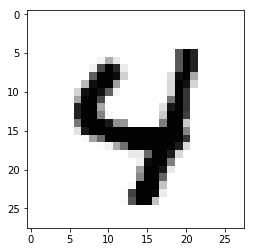

In [95]:
image_index = np.random.randint(0,10000)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted label is', pred.argmax())

## Evaluate Final Model

In [96]:
pred = model.predict(x_test)
pred_label = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_label)
print('The final model achieves {:04.2f}% accuracy on the test partition.'.format(acc*100))

The final model achieves 98.62% accuracy on the test partition.
